In [ ]:
!pip install numdifftools

     |████████████████████████████████| 99 kB 3.7 MB/s 
     |████████████████████████████████| 189 kB 25.0 MB/s 
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=7c4a097e0e693e24600ba03b2fa30356474c3b74262d0ec2ed12cfb80813cff4
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built algopy


In [ ]:
import numpy as np
from scipy.misc import derivative
from scipy.optimize import minimize_scalar
import numdifftools as nd
from scipy.optimize import NonlinearConstraint
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
import cvxpy as cp
import matplotlib.pyplot as plt

%matplotlib inline

Les algorithmes du livre sont en Julia mais apparemment les traductions dans d'autres langages sont disponibles sur le site du livre http://mitpress.mit.edu/algorithms-for-optimization.

## Chapitre 1

Généralités sur l'optimisation.

Un "$\textit{design point}$" de dimension n est un vecteur de $\mathbb{R}^{n}$.

Différents types de minima:

- $\mathbf{x^{*}}$ minimum local fort si $\exists \delta > 0$ tel que $f(\mathbf{x^{*}}) < f(\mathbf{x})$ si $\vert\vert\mathbf{x^{*}} - \mathbf{x}\vert\vert < \delta$
- $\mathbf{x^{*}}$ minimum local faible si $\exists \delta > 0$ tel que $f(\mathbf{x^{*}}) \leq f(\mathbf{x})$ si $\vert\vert\mathbf{x^{*}} - \mathbf{x}\vert\vert < \delta$
- $\mathbf{x^{*}}$ minimum global fort si $\forall\mathbf{x}, f(\mathbf{x^{*}}) < f(\mathbf{x})$ 
- $\mathbf{x^{*}}$ minimum global faible si $\forall\mathbf{x}, f(\mathbf{x^{*}}) \leq f(\mathbf{x})$ 


Notations :
- FONC = First order necessary condition $f^{'}(x)=0$ ou $\nabla f(\mathbf{x}) = 0$
- SONC = Second order necessary condition $f^{''}(x)\geq 0$ ou $\nabla^{2} f(\mathbf{x})$ est semi-définie positive.
- SOSC = Second order sufficient condition = FONC satisfaite et  $\nabla^{2} f(\mathbf{x})$ est définie positive.

Overview :

- Chapitre 2 : calcul de dérivées
- Chapitre 3 : Bracketting (pour les fonctions d'une seule variable, permet d'identifier un intervalle dans lequel on a un min local).
- Chapitre 4 : Local descent (descente de gradient)
- Chapitre 5 : techniques pour choisir la meilleure direction de descente
- Chapitre 6 : Second-order approximations (informent sur la direction et la taille du pas)
- Chapitre 7 : Direct methods (n'utilisent pas la descente de gradient, cherchent directement le min dans des directions données).
- Chapitre 8 : méthodes stochastiques
- Chapitre 9 : population methods (on utilise une collection de points pour ?)
- Chapitre 10 : Optimisation sous contraintes
- Chapitre 11 : Problèmes linéaires (simplex)
- Chapitre 12 : Multiobjective optimization
- Chapitre 13 : Sampling plans to cover the design space
- Chapitre 14 : Surrogate models (models used when objective function is very expansive to compute).
- Chapitre 15 : Probabilistic Surrogate models (to quantify our confidence in the predictions of the models).
- Chapitre 16 : shows how to use models from chapter 15 to do surrogate optimization.
- Chapitre 17 : optimization under uncertainty (quand la fonction objecctif n'est plus forcément déterministe).
- Chapitre 18 : uncertainty propagation 
- Chapitre 19 : approche des problèmes où les variables sont discrètes.
- Chapitre 20 : ?
- Chapitre 21 : multidisciplinary design optimization

- Appendice A : language Julia
- Appendice B : fonctions pour tester les algos
- Appendice C : concepts mathématiques.


## Fonctions de tests (appendice B)

In [ ]:
"""used to test a method’s susceptibility to getting
stuck in local minima. It is comprised of two primary components—a sinusoidal
component that produces a multitude of local minima and an exponential bell
curve centered at the origin, which establishes the function’s global minimum."""


def ackley(x, a=20, b=0.2, c=2*np.pi):
    
    n = len(x)
    
    
    return -a*np.exp(-b*np.sqrt(1/n)*np.linalg.norm(x))-np.exp(1/n*sum([np.cos(c*x[i]) for i in range(n)])) + a + np.exp(1)

In [ ]:
ackley([1,2,3])

7.016453608269398

In [ ]:
"""Two-dimensional function with a global minimum at (1,3)"""

def booth(x):
    
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2

In [ ]:
booth(np.array([0,0]))

74

In [ ]:
"""Two-dimensional function, It has no local minima aside from global minima with x0 = π + 2πm for
integral m."""

def branin(x, a=1,b=5.1/((4*np.pi)**2), c=5/np.pi, r=6, s=10, t=1/(8*np.pi)):
    
    return a*(x[1]-b*x[0]**2+c*x[0]-r)**2 + s*(1-t)*np.cos(x[0]) + s

In [ ]:
branin([1,2])

21.145288037650868

In [ ]:
"""Two-dimensional function. The flower function is minimized near the origin but does not have a global
minimum due to atan being undefined at (0, 0)."""


def flower(x, a=1, b=1, c=4):
    return a*np.linalg.norm(x)+b*np.sin(c*np.arctan2(x[1],x[0]))

In [ ]:
flower([1,2])

1.2760679774997898

In [ ]:
"""n-dimensional function. The global minimum
depends on the number of dimensions. In two dimensions the minimum is at approximately
(2.20, 1.57)."""


def michalewicz(x, m=10):
    
    return -sum([np.sin(x[i])*np.sin(i*x[i]**2/np.pi)**(2*m) for i in range(len(x))])


In [ ]:
michalewicz([1,2])

-0.3701429452781076

In [ ]:
"""Two-dimensional function with a global minimum at (a, a²)"""

def rosenbrock(x, a=1, b=5):
    
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

In [ ]:
rosenbrock([1,1])

0

In [ ]:
"""Two-dimensional function with a single global
minimum in a deep curved peak."""

def wheeler(x, a=1.5):
    
    return -np.exp(-(x[0]*x[1]-a)**2-(x[1]-a)**2)

In [ ]:
wheeler([1,3/2])

-1.0

In [ ]:
"""Multiobjective function, two-dimensional"""

def circle(x):
    
    theta = x[0]
    r = 1/2+1/2*((2*x[1])/(1+x[1]**2))
    
    y1 = 1-r*np.cos(theta)
    y2 = 1-r*np.sin(theta)
    
    return [y1,y2]


In [ ]:
circle([0.2,4.3])

[0.29373857948793025, 0.8568337223695929]

## Chapitre 2

Plusieurs méthodes de dérivations sont décrites (forward, backward, central).

Une technique en passant par les complexes est donnée comme exemple pour s'affranchir des problèmes de pas de dérivation trop petit.

Exemples aussi d'AD (automatic differentiation).

On utilise en dessous la fonction derivative du package scipy.misc.

In [ ]:
x = 0
X = np.linspace(0,10,100)

d = derivative(np.exp,x,dx=0.01)
D = derivative(np.exp, X, dx = 0.01)

print(d)
print(D)


1.0000166667499921
[1.00001667e+00 1.10630625e+00 1.22389313e+00 1.35397806e+00
 1.49788943e+00 1.65709683e+00 1.83322603e+00 2.02807562e+00
 2.24363535e+00 2.48210645e+00 2.74592413e+00 3.03778241e+00
 3.36066167e+00 3.71785905e+00 4.11302218e+00 4.55018632e+00
 5.03381569e+00 5.56884897e+00 6.16074976e+00 6.81556240e+00
 7.53997365e+00 8.34138098e+00 9.22796815e+00 1.02087887e+01
 1.12938586e+01 1.24942582e+01 1.38222456e+01 1.52913819e+01
 1.69166695e+01 1.87147053e+01 2.07038505e+01 2.29044175e+01
 2.53388781e+01 2.80320921e+01 3.10115619e+01 3.43077131e+01
 3.79542051e+01 4.19882746e+01 4.64511167e+01 5.13883044e+01
 5.68502551e+01 6.28927445e+01 6.95774770e+01 7.69727151e+01
 8.51539769e+01 9.42048072e+01 1.04217630e+02 1.15294695e+02
 1.27549116e+02 1.41106033e+02 1.56103885e+02 1.72695826e+02
 1.91051289e+02 2.11357713e+02 2.33822463e+02 2.58674942e+02
 2.86168936e+02 3.16585208e+02 3.50234358e+02 3.87460003e+02
 4.28642281e+02 4.74201733e+02 5.24603600e+02 5.80362571e+02
 6.42

## Chapitre 3

Méthode de bracketting. But : trouver un intervalle où on a un min.

**Définition** : une fonction unimodale $f$ est une fonction telle qu'il existe un unique $x^{*}$ tel que la fonction soit décroissante pour $x \leq x^{*}$ et croissante pour $x \geq x^{*}$.

Si $f$ est unimodale, on peut *bracketter* un intervalle $[a,c]$ contenant le minimum (qui est global d'après la définition de l'unimodalité) si on peut trouver trois point $a$, $b$, $c$, tels que $a < b < c$ et $f(a) > f(b) < f(c)$.

Le but étant ensuite de résuire la taille de l'intervalle *bracketté* pour converger vers le minimum.

**NB : l'algo ne marche pas sur les fonctions qui n'ont pas de minima locaux comme l'exponentielle.**



In [ ]:
def bracket_minimum(f, x=0, s=1e-2, k=2.0):
  a, ya = x, f(x)
  b, yb = a + s, f(a+s)

  if yb > ya:
    a, b = b, a
    ya, yb = yb, ya
    s = -s
  
  while True:

    c, yc = b + s, f(b+s)
    if yc > yb:

      if a < c: 
        return (a,c)
      else:
        return (c,a)
    
    a, ya, b, yb = b, yb, c, yc
    s *= k


In [ ]:
#Exemple

def g(x):
  return x**2

bracket_minimum(g, x=1)

(-1.55, 0.36999999999999994)

Méthodes pour réduire l'intervalle :

1.   *Fibonacci Search* permet de spécifier un nombre d'appels de $f$. La taille de l'intervalle est divisé par $F_{n+1}$ ($n+1^{ème}$ terme de la suite de Fibonacci) si on s'autorise à appeler $n$ fois $f$.
2.   *Golden ratio Search* similaire.


**NB : les deux méthodes précédentes s'appliquent à des fonctions non -unimodales mais on n'est pas garanti d'avoir un min globale.**

3. *Quadratic fit search* approche basé sur le fait que quand on "zoom" sur un min local, la fonction est souvent de forme quadratique. Cette méthode est plus rapide que la deuxième.

4. *Shubert-Piyavskii* méthode (élaborée) qui marche avec des fonctions lipschitziennes. Contrairement aux méthodes précédentes, celle-ci est une **méthode d'optimisation globale** et assure de trouver un min globale même si la fonction a plusieurs min locaux et/ou n'est pas unimodale. L'algorithme retourne le min et des intervalles.


5. *Bisection Method* **Méthode encore différente** qui permet de trouver les racines d'une fonction, utile pour trouver les racines de la dérivée de la fonction de coût. Basée sur le TVI et la dichotomie (on mentionne aussi la méthode de *Brent-Dekker* qui est une extension de cette méthode).


## Chapitre 4

NB : *step size* fait référence à la taille du pas dans la descente de gradient (implique que la norme de la direction est 1). *Learning rate* fait référence à un scalaire devant un vecteur donnant la direction de la descente et non nécessairement de norme 1.

### Line Search

On suppose qu'on a déterminé la direction de descente **d**. On cherche la taille du pas $\alpha$. Le *line search* cinsiste à résoudre : 

$$\underset{\alpha \in \mathbb{R}}{\text{min}}  \; f(\mathbf{x}+\alpha \mathbf{d})$$

In [ ]:
def line_search(f,x,d):
  cost_function = lambda a: f(x+a*d) 
  a_opt = minimize_scalar(cost_function, method='brent')

  return x + a_opt.x*d

In [ ]:
def test_1(x):

  return np.sin(x[0]*x[1])+np.exp(x[1]+x[2])-x[2]

x = np.array([1,2,3])
d = np.array([0,-1,-1])

print(line_search(test_1,x,d))


[ 1.         -1.12704561 -0.12704561]


### Approximate Line Search

La méthode précédente peut être très couteuse en temps de calcul (une minimisation à chaque étape). On peut être moins précis que ça et faire en sorte que $\alpha$ cause une diminution suffisante de la fonction de coût.
Un algorithme permettant de faire ça est le *backtracking line search*. Il part d'un grand pas et le diminue jusqu'à ce que la **condition de diminution suffisante** soit remplie. Elle s'énonce ainsi :

$$f(\mathbf{x}^{(k+1)}) \leq f(\mathbf{x}^{(k)}) + \beta\alpha\langle\nabla f(\mathbf{x}^{(k)}),\mathbf{d}^{(k)}\rangle$$

Elle est aussi appelée condition d'Armijo.

$\beta$ est un hyperparamètre dans $[0,1]$ permettant de contrôlé le seuil d'acceptabilité de $\alpha$.  S'il est nul, tous les $\alpha$ sont acceptés et s'il vaut 1, la décroissance doit être au moins aussi bonne que celle qui serait prédite par une approximation du premier ordre.

In [ ]:
def gradient(f,x):
  grad_x = nd.Gradient(f)(x)

  return grad_x

def backtracking_line_search(f, x, d, alpha, p=0.5, beta=1e-4):
  y,g = f(x), gradient(f,x)

  while f(x+alpha*d) > y + beta*alpha*np.inner(g,d):
    alpha *= p
  
  return alpha

Cette technique est garantie de converger vers un minimum local.

Une autre condition, appelée **condition de courbure** requiert que la dérivée directionnelle de l'itération suivante soit "moins profonde" que la précédente. Cela se traduit par :

$$\langle\nabla f(\mathbf{x}^{(k+1)}),\mathbf{d}^{(k)}\rangle \geq \sigma\langle\nabla f(\mathbf{x}^{(k)}),\mathbf{d}^{(k)}\rangle$$

où $\sigma$ vérifie $\beta < \sigma < 1$ (typiquement $\sigma=0.1$ quand on utilise l'*approximate linear search* avec la méthode des gradients conjugués et $\sigma=0.9$ quand on utilise la méthode de Newton, ce que nous verrons dans les chapitres suivant).

Une alternative de cette dernière condition est la **condition de courbure forte** où on impose à la pente d'être négative :

$$\vert\langle\nabla f(\mathbf{x}^{(k+1)}),\mathbf{d}^{(k)}\rangle\vert \leq -\sigma\langle\nabla f(\mathbf{x}^{(k)}),\mathbf{d}^{(k)}\rangle$$

Ensemble, les conditions de courbure et de décroissance suffisante forment les **conditions de Wolfe** (respectivement les **conditions fortes de Wolfe** si on considère la condition forte de courbure).

**Condition de décroissance suffisante = première condition de Wolfe.**

**Condition de courbure = deuxième condition de Wolfe.**


In [ ]:
def approximate_line_search(f, x, d, alpha, sigma, p=0.5, beta=1e-4):

  alpha_opt = backtracking_line_search(f, x, d, alpha, p, beta)

  new_x = x + alpha_opt*d

  if np.inner(gradient(f,new_x),d) >= sigma*np.inner(gradient(f,x),d):
    return new_x

  else:
    print("La deuxième condition de Wolfe n'est pas respectée.")




In [ ]:
def test_2(x):
  return x[0]**2+x[0]*x[1]+ x[1]**2

#Paramètres 

#f=test_2
x = np.array([1,2])
d = np.array([-1,-1])
alpha = 10
sigma = 0.9

#print(test_2(x+alpha*d))
#print(gradient(test_2,x))
#print(backtracking_line_search(test_2,x,d,alpha))
print(approximate_line_search(test_2, x, d, alpha, sigma))

[-1.5 -0.5]


NB : la deuxième condition de Wolfe est nécessaire pour s'assurer que la dérivée seconde de la fonction de coût est positive et donc que le min est globale.

In [ ]:
def strong_backtracking(f, x , d, alpha=1, beta=1e-4, sigma = 0.1):
  y0, g0, y_prev, alpha_prev = f(x), np.inner(gradient(f,x),d), np.nan,0
  alpha_low, alpha_high = np.nan, np.nan

  #first step bracketting
  #L'algorithme commence par bracketter un intervalle contenant un pas 
  # qui satisfait les conditions fortes de Wolfe
  
  while True:
    y = f(x + alpha*d)
    if y > y0 + beta*alpha*g0 or (y_prev != np.nan and y >= y_prev):
      alpha_low, alpha_high = alpha_prev, alpha
      break
    g = np.inner(gradient(f, x + alpha*d),d)
    if abs(g) <= -sigma*g0:
      return alpha
    elif g >= 0:
      alpha_low, alpha_high = alpha, alpha_prev
      break
    
    y_prev, alpha_prev, alpha = y, alpha, 2*alpha

  #Second step, zoom phase
  #Une fois ue l'algorithme a trouvé un intervalle, on zoom sur l'intervalle
  # avec la méthode des bisections pour jusqu'à trouver un pas qui satisfait
  # les conditions fortes de Wolfe

  y_low = f(x + alpha_low*d)

  while True:
    alpha = (alpha_low + alpha_high)/2
    y = f(x + alpha*d)

    if y > y0 + beta*alpha*g0 or y >= y_low:
      alpha_high = alpha

    else:
      g = np.inner(gradient(f,x + alpha*d),d)
      if abs(g) <= -sigma*g0:
        return alpha
      elif g*(alpha_high - alpha_low) >= 0:
        alpha_high = alpha_low
      
      alpha_low = alpha

In [ ]:
#Paramètres 

#f=test_2
x = np.array([1,2])
d = np.array([-1,-1])
alpha = 10

print(backtracking_line_search(test_2,x,d,alpha))
print(strong_backtracking(test_2,x,d))

2.5
1.5


### Trust region methods

Les méthodes de descente précédentes peuvent résulter en des pas trops grands ou des convergences trop rapides.

Contrairement aux méthodes précédentes, les *trust region methods* commencent par choisir la taille du pas maximale puis la direction. L'algorithme trouve le prochain point $\mathbf{x^{'}}$ en minimisant un modèle de la fonction de coût $f$ que l'on note $\hat{f}$ sur une boule centrée en $\mathbf{x}$ le point courant dans l'itération. La région de confiance est alors :

$$\mathcal{B}(\mathbf{x},\delta) = \{\mathbf{x^{'}}, \vert\vert\mathbf{x}-\mathbf{x^{'}}\vert\vert \leq \delta\}$$

Un exemple de $\hat{f}$ est l'approximation de f au second ordre (Taylor, voir appendice C.2) :

$$\hat{f}(\mathbf{x^{'}}) = f(\mathbf{x}) + \nabla f(\mathbf{x})^\top(\mathbf{x^{'}}-\mathbf{x})+\frac{1}{2}(\mathbf{x^{'}}-\mathbf{x})^\top\nabla^{2} f(\mathbf{x})(\mathbf{x^{'}}-\mathbf{x})$$

Trouver le prochain $\mathbf{x^{'}}$ point revient alors à résoudre :

$$\underset{\mathbf{x^{'}}}{\text{min}}  \; \hat{f}(\mathbf{x^{'}})$$

$$s.c \ \vert\vert\mathbf{x}-\mathbf{x^{'}}\vert\vert \leq \delta\$$

Le rayon de la région de confiance $\delta$ est choisi selon les performances de notre approximation $\hat{f}$ :

$$\eta = \frac{\Delta y_{act}}{\Delta y_{pred}} = \frac{f(\mathbf{x})-f(\mathbf{x^{'}})}{f(\mathbf{x})-\hat{f}(\mathbf{x^{'}})} = \frac{actual \ improvement}{predicted \ improvement}$$

- Si $\eta \approx 1$, notre prédiction est bonne.
- Si $\eta < \eta_{1}$, on considère que l'amélioration est plus basse qu'attendu, $\delta$ est trop grand, il faut le diminuer d'un facteur $\gamma_{1} < 1$ ($\eta_{1}$ est un seuil fixé).
- Si $\eta > \eta_{2}$, on considère  que $\delta$ est trop petit, il faut l'augmenter d'un facteur $\gamma_{2} > 1$ ($\eta_{2}$ est un seuil fixé).



In [ ]:
# x0 fait référence u point courant 
# x est la variable

x0 = np.array([1,1])

def hessian(f,x):
  hess_x = nd.Hessian(f)(x)

  return hess_x

print(hessian(test_2,x0))  



[[2. 1.]
 [1. 2.]]


In [ ]:
def solve_trust_region_subproblem(f,x0, delta):

  n = len(x0)

  q = gradient(f,x0)
  P = hessian(f,x0)
  x = cp.Variable(n)

  prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x-x0, P) + q.T @ (x-x0)),
                 [cp.norm(x-x0, 2) <= delta])
  
  prob.solve()
  
  return x.value, prob.value

#Test
#Paramètres

def test_2(x):
  return x[0]**2+x[0]*x[1]+ x[1]**2


x0 = np.array([1,1])
f = lambda x: test_2(x)
delta = 1


print(solve_trust_region_subproblem(f,x0, delta))





(array([0.29289322, 0.29289322]), -2.7426406875513716)


In [ ]:
def trust_region_descent(f, x, k_max, eta_1 = 0.25, eta_2 = 0.5, gamma_1 = 0.5, gamma_2 = 2.0, delta = 1.0):
  y=f(x)
  for k in range(k_max):

    x_prime, y_prime = solve_trust_region_subproblem(f,x, delta)
    r = (y-f(x_prime))/(y-y_prime)

    if r < eta_1:
      delta *= gamma_1
    else:
      x, y = x_prime, y_prime

      if r > eta_2:
        delta *= gamma_2
    
  return x


### Termination Conditions

Dans les algorithmes de descentes, il y a quatre manières usuelles d'arrêter l'algorithme :

- Définir un maximum d'itération $k_{max}$.
- *Absolute improvment* = On s'arrête si la différence de $f$ entre les deux points consécutifs de l'itération est plus petite qu'un $\epsilon$ fixé :
$$\vert f(\mathbf{x}^{(k+1)})-f(\mathbf{x}^{(k)})\vert \leq \epsilon$$ 
- *Relative Improvement* :

$$\vert f(\mathbf{x}^{(k+1)})-f(\mathbf{x}^{(k)})\vert \leq \epsilon\vert f(\mathbf{x}^{(k)})\vert$$ 

- *Gradient magnitude* :

$$\vert\vert \nabla f(\mathbf{x}^{(k+1)})\vert\vert\leq \epsilon$$

## Chapitre 5

Dans ce chapitre sont présentées des méthodes du premier ordre pour choisir la direction de la descente.

### Gradient Descent

La direction de descente la plus "raide" est l'opposée du gradient $\nabla f$.

On note $\mathbf{g}^{(k)} = \nabla f(\mathbf{x}^{(k)})$.

On choisit souvent :

$$\mathbf{d}^{(k)} = -\frac{\mathbf{g}^{(k)}}{\vert\vert\mathbf{g}^{(k)}\vert\vert}$$

puis $\alpha^{(k)}$ avec un *line search* (par exemple).

In [ ]:
#Fonction faisant une étape dans la descente de gradient

def one_step_gradient_descent(f,x):
  grad_x = gradient(f,x)
  norm_grad = np.linalg.norm(grad_x)

  if norm_grad==0:
    print(x, "est un point stationnaire.")
    return x 
  
  else:

    d = -(1/norm_grad)*grad_x
    x_prime = line_search(f,x,d)

    return x_prime

def gradient_descent(f,x0,epsilon = 1e-5, kmax=1000):
  k=0

  #x_k+1 = x_prime
  #x_k = x

  x = x0
  x_prime = one_step_gradient_descent(f,x0)

  while np.linalg.norm(x_prime - x) >= epsilon and k < kmax:

    x, x_prime = x_prime, one_step_gradient_descent(f,x_prime)

    k += 1

  if k == kmax:

    
    print("L'algorithme de la descente de gradient n'a pas convergé en ", k," itérations. Le point courant est ", x_prime,".")
  
  else:

    return x_prime



In [ ]:
#Test avec la fonction booth (cf au dessus)

x0 = np.array([0,0])

print(gradient_descent(booth,x0))



[1.00000019 2.99999982]


### Conjugate Gradient

La descente de gradient peut être peu performante dans des vallées étroites. La méthode du gradient conjugué permet de s'affranchir de ce problème.

Elle se base sur la forme quadratique des fonctions au voisinage de leur minima locaux.

Deux méthodes : "Fletcher-Reeves" et "Polak-Ribiere".

In [ ]:
def compute_beta(g_prev, g, method):

  if method == "Fletcher-Reeves":
    return np.inner(g,g)/np.inner(g_prev,g_prev)
  
  elif method == "Polak-Ribiere":

    return np.inner(g,g-g_prev)/np.inner(g_prev,g_prev)



In [ ]:
#Test sur compute beta

g_prev = np.array([1,1])
g = np.array([2,2])
method = "Polak-Ribiere"

print(compute_beta(g_prev, g, method))


2.0


In [ ]:
def one_step_conjugate_gradient(f,x,g_prev,g,d_prev,method):

  beta = max(compute_beta(g_prev, g, method),0) #permet de garantir la convergence pour la méthode de Polak-Riviere

  d = -g + beta*d_prev

  return line_search(f,x,d), d


  

In [ ]:
def conjugate_gradient(f,x0,method = "Polak-Ribiere",epsilon = 1e-5, kmax=1000):
  
  #x_(-1) = x0, g_(-1) = grad f(x0), d_(-1) = -g_(-1)
  
  #Dans la suite :
  #x_k = x
  #x_(k-1) = x_prev
  #x_k+1 = x_prime
  # et de la même manière pour g_prev, g, g_prime, d_prev, d

  k=0
  x_prev = x0
  x = x0
  g_prev = gradient(f,x_prev)
  g = gradient(f,x)
  d_prev = -g_prev
  x_prime, d = one_step_conjugate_gradient(f,x,g_prev,g,d_prev,method)
  
  
  while np.linalg.norm(x_prime - x) >= epsilon and k < kmax:

    g_prev = g
    g = gradient(f,x_prime)
    d_prev = d

    x = x_prime
    x_prime, d = one_step_conjugate_gradient(f,x,g_prev,g,d_prev,method)

    k += 1

  if k == kmax:

    
    print("L'algorithme des gradients conjugués n'a pas convergé en ", k," itérations. Le point courant est ", x_prime,".")
  
  else:

    return x_prime




In [ ]:
#Test avec la fonction booth (cf au dessus)

x0 = np.array([0,0])

print(conjugate_gradient(booth,x0,))

[1. 3.]


### Momentum

La descente de gradient classique peut mettre du temps à traverser des regions où la fonction de coût est très plate. 

La méthode *Momentum* est une manière d'accélérer la descente dans ce genre de situation.

$$\mathbf{v}^{(k+1)} = \beta\mathbf{v}^{(k)} - \alpha\mathbf{g}^{(k)}$$

$$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{v}^{(k+1)}$$

NB : pour $\beta = 0$, on reconnait la descente de gradient classique.

**Interprétation** : la méthode *Momentum* peut s'interprêter comme l'accélération d'une balle, à l'aide de la gravité, sur un plan légèrement incliné. La vitesse (*Momentum*) augmente de plus en plus. Dans le cadre numérique, le gradient peut être interprêté comme la gravité qui fait augmenter le *Momentum*.



In [ ]:
#Fonction faisant une étape de la méthode momentum
# alpha et beta sont des hyperparamètres

def one_step_momentum(f,x,v,alpha,beta):
  grad_x = gradient(f,x)
  
  v_prime = beta*v - alpha*grad_x

  x_prime = x + v_prime

  return x_prime, v_prime

def momentum(f,x0,alpha,beta,epsilon = 1e-5, kmax=1000):
  k=0

  #x_k+1 = x_prime
  #x_k = x
  #v_k+1 = v_prime
  #v_k = v

  x = x0
  v = np.array([0 for _ in range(len(x0))])

  x_prime, v_prime = one_step_momentum(f,x,v,alpha,beta)

  while np.linalg.norm(x_prime - x) >= epsilon and k < kmax:

    x, v = x_prime, v_prime

    x_prime, v_prime = one_step_momentum(f,x,v,alpha,beta)

    k += 1

  if k == kmax:

    
    print("L'algorithme de la descente de gradient n'a pas convergé en ", k," itérations. Le point courant est ", x_prime,".")
  
  else:

    return x_prime

In [ ]:
#Test avec la fonction Rosenbrock (b=1, cf au dessus)

x0 = np.array([0,0])
f = lambda x: rosenbrock(x, a=1, b=1)
alpha = 0.1
beta = 0

#ici descente de gradient classique à pas constant
#le min global est [1,1]

print(momentum(f,x0,alpha,beta)) 

[0.9998925  0.99974047]


### Nesterov Momentum

Un inconvénient de la méthode précédente, et que les pas ne rapetissent pas suffisamment en fond de vallées (ie proche des minima locaux) et elle a donc tendance à les manquer. 

Cette méthode permet d'éviter ce défaut :

$$\mathbf{v}^{(k+1)} = \beta\mathbf{v}^{(k)} - \alpha\nabla f(\mathbf{x}^{(k)}+\beta\mathbf{v}^{(k)})$$

$$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{v}^{(k+1)}$$

In [ ]:
#Fonction faisant une étape de la méthode Nesterov
#alpha et beta hyperparamètres

def one_step_nesterov(f,x,v,alpha,beta):
  grad = gradient(f,x + beta*v)
  
  v_prime = beta*v - alpha*grad

  x_prime = x + v_prime

  return x_prime, v_prime

def nesterov(f,x0,alpha,beta,epsilon = 1e-5, kmax=1000):
  k=0

  #x_k+1 = x_prime
  #x_k = x
  #v_k+1 = v_prime
  #v_k = v

  x = x0
  v = np.array([0 for _ in range(len(x0))])

  x_prime, v_prime = one_step_nesterov(f,x,v,alpha,beta)

  while np.linalg.norm(x_prime - x) >= epsilon and k < kmax:

    x, v = x_prime, v_prime

    x_prime, v_prime = one_step_nesterov(f,x,v,alpha,beta)

    k += 1

  if k == kmax:

    
    print("L'algorithme de la descente de gradient n'a pas convergé en ", k," itérations. Le point courant est ", x_prime,".")
  
  else:

    return x_prime

In [ ]:
#Test avec la fonction Rosenbrock (b=1, cf au dessus)

x0 = np.array([0,0])
f = lambda x: rosenbrock(x, a=1, b=1)
alpha = 0.1
beta = 0.1

#le min global est [1,1]

print(nesterov(f,x0,alpha,beta))

[0.99990493 0.99977049]
[-2.  0.]


[texte du lien](https://)### Adagrad

Dans les deux méthodes précédentes, toutes les composantes de $\mathbf{x}$ avec le même *learning rate*. La méthode *Adagrad = adaptative subgradient* adapte un *learning rate* particulier pour chaque composante de $\mathbf{x}$.

Adagrad atténue l'influence des paramètres avec des
gradients élevés.

$$x_i^{(k+1)} = x_i^{(k)} - \frac{\alpha}{\epsilon + \sqrt{s_i^{(k)}}}g_i^{(k)}$$

$$s_i^{(k)} = \sum_{j=1}^{k} \left( g_i^{(j)}\right)^2$$

Typiquement $\epsilon = 10^{-8}$, permet d'éviter des divisions par 0.

*Adagrad* est beaucoup moins sensible à l'hyperparamètre $\alpha$ (*learning rate*) qui est typiquement fixé à 0,01.

En revanche, cette méthode a une faiblesse lié au fait que les composantes de $\mathbf{s}$ augmentent. Cela peut rendre le *learning rate* très petit avant la convergence.



In [ ]:
from operator import xor
#Fonction faisant une étape de la méthode Adagrad
#alpha = 0.01 typiquement et beta hyperparamètres

def one_step_adagrad(f,x,s,alpha,epsilon):
  grad = gradient(f,x)

  s += grad*grad
  
  x_prime = np.array([x[i] - alpha/(epsilon + np.sqrt(s[i]))*grad[i] for i in range(len(x))])

  

  return s, x_prime

def adagrad(f,x0,alpha = 0.01, epsilon = 1e-8, convergence_criteria = 1e-5, kmax=1000):
  k=0

  #x_k+1 = x_prime
  #x_k = x
  #v_k+1 = v_prime
  #v_k = v

  x = x0
  s = np.array([0 for _ in range(len(x0))])

  s, x_prime = one_step_adagrad(f,x,s,alpha,epsilon)

  while np.linalg.norm(x_prime - x) >= convergence_criteria and k < kmax:

    xor

    k += 1

  if k == kmax:

    
    print("L'algorithme de la descente de gradient n'a pas convergé en ", k," itérations. Le point courant est ", x_prime,".")
  
  else:

    return x_prime

In [ ]:
x = np.array([1,1,1])
y = np.array([2,2,2])

print(x)

x += y*y

print(np.array([x[i] for i in range(len(x))]))

[1 1 1]
[5 5 5]


Regarder les méthodes de back propagation du terme d'erreur dans les réseaux de neurones.

Regarder quels types de méthodes de descente de gradient sont utilisées dans les réseaux de neurones.


###Méthodes sans gradients

Algorithme génétique

In [ ]:
def genetic(f,n_dims,n_samples,n_gens,lims,k_max,sigma,l=1/2):
  x = np.array([[np.random.uniform(lims[j][0],lims[j][1]) for j in range(n_dims)] for n in range(n_samples)])
  history = [x]
  for gen in range(n_gens):
    y = np.array([f(x[i]) for i in range(n_samples)]).reshape(-1,1)
    ind = np.argsort(y, axis=0)
    z = np.take_along_axis(x, ind, axis=0)
    x_top = z[:k_max]
    x = np.zeros((n_samples,n_dims))
    for m in range(n_samples):
      k1 = np.random.randint(k_max)
      k2 = np.random.randint(k_max-1)
      if k2 >= k1:
        k2 += 1
      child = l*x_top[k1]+(1-l)*x_top[k2] + np.random.normal(0,sigma,n_dims)
      x[m] = child
    history = history + [x]
  y = np.array([f(x[i]) for i in range(n_samples)]).reshape(-1,1)
  k = np.argmin(y)
  return(x[k],history)

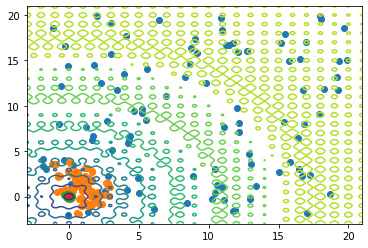

In [ ]:
x = np.arange(-3,21,0.05)
y = np.arange(-3,21,0.05)
X, Y = np.meshgrid(x, y)
Z = [[ackley([x[i],y[j]]) for j in range(len(y))] for i in range(len(x))]
plt.contour(X,Y,Z,10)

x,h = genetic(ackley,2,100,10,[[-2,20],[-2,20]],10,0.1, l = 0.5)
plt.scatter(h[0][:,0],h[0][:,1])
plt.scatter(h[1][:,0],h[1][:,1])
plt.scatter(h[-1][:,0],h[-1][:,1])
plt.scatter([x[0]],[x[1]]);

In [ ]:
def swarm(f,n_dims,n_samples,n_iters,lims,w=1,c1=1,c2=1):
  x = np.array([[np.random.uniform(lims[j][0],lims[j][1]) for j in range(n_dims)] for n in range(n_samples)])
  history = [x]
  v = np.zeros_like(x)
  y = np.array([f(x[i]) for i in range(n_samples)])
  xmin = x[np.argmin(y)]
  ymin = f(xmin)
  xb = np.copy(x)
  yb = np.copy(y)
  for k in range(n_iters):
    r = np.random.random(size = 2)
    v = w*v+r[0]*c1*(xb-x)+r[1]*c2*(xmin-x)
    x = x+v
    y = np.array([f(x[i]) for i in range(n_samples)])
    xmin1 = x[np.argmin(y)]
    if f(xmin1)<ymin:
      xmin = xmin1
      ymin = f(xmin)
    xb[y<yb] = x[y<yb]
    yb = np.minimum(y,yb)
    history += [x]
  return x[np.argmin(f(x))],history

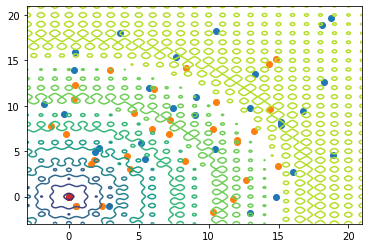

In [ ]:
x = np.arange(-3,21,0.05)
y = np.arange(-3,21,0.05)
X, Y = np.meshgrid(x, y)
Z = [[ackley([x[i],y[j]]) for j in range(len(y))] for i in range(len(x))]
plt.contour(X,Y,Z,10)

x,h = swarm(ackley,2,30,50,[[-2,20],[-2,20]], 0.5,0.5,0.5)
plt.scatter(h[0][:,0],h[0][:,1])
plt.scatter(h[1][:,0],h[1][:,1])
plt.scatter(h[-1][:,0],h[-1][:,1])
plt.scatter([x[0]],[x[1]])
plt.show()